In [44]:
## Shopping cart analysis starter.
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook


In [45]:
fcsv = "https://raw.githubusercontent.com/multidis/hult-retail-analytics/main/shopping_cart/transactions_binary.csv"
df_trans = pd.read_csv(fcsv)
df_trans

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# top items by purchase frequency: lower support threshold to find more items (longer runtime)
freq_items = apriori(df_trans, min_support=0.02, use_colnames=True, verbose=1)
freq_items.sort_values(by = "support", ascending = False).head(20)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
16,0.255516,(whole milk)
15,0.193493,(other vegetables)
32,0.183935,(rolls/buns)
42,0.174377,(soda)
21,0.139502,(yogurt)
41,0.110524,(bottled water)
13,0.108998,(root vegetables)
9,0.104931,(tropical fruit)
58,0.098526,(shopping bags)
1,0.093950,(sausage)


In [47]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.52834


In [48]:
rules_ = association_rules(freq_items, metric = "lift", min_threshold =2)
rules_

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
1,(tropical fruit),(pip fruit),0.104931,0.075648,0.020437,0.194767,2.574648,0.012499,1.147931
2,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
3,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
4,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
5,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
6,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
7,(other vegetables),(whipped/sour cream),0.193493,0.071683,0.028876,0.149238,2.081924,0.015006,1.091160
8,(yogurt),(whipped/sour cream),0.139502,0.071683,0.020742,0.148688,2.074251,0.010742,1.090455
9,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881


In [49]:
# filter rules for a specific product
rules[ rules["antecedents"].apply(lambda x: "yogurt" in x) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.52834


In [50]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.52834,2


In [51]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules_['confidence'] > 0.75) &
       (rules_['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len


In [52]:
rules[rules['antecedents'] == {'Eggs', 'Kidney Beans'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len


In [53]:
rules = rules[['antecedents', 'consequents', 'support']]
rules

,antecedents,consequents,support
0,"(yogurt, other vegetables)",(whole milk),0.022267


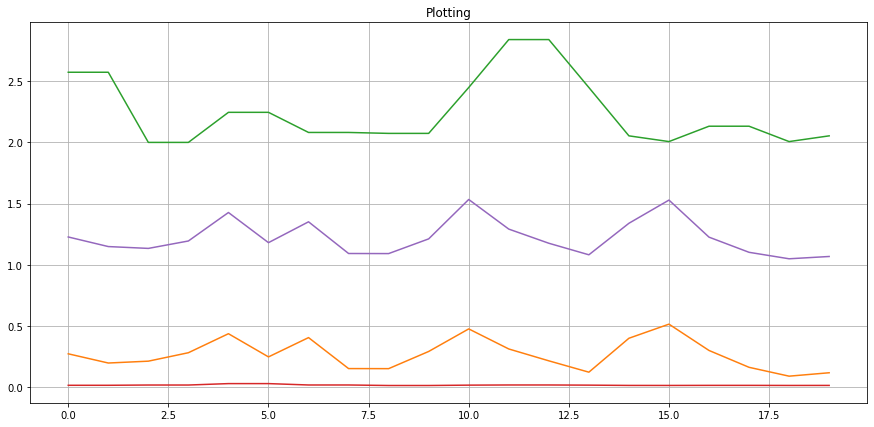

In [54]:
plt.figure(figsize=(15, 7))
plt.plot(rules.support)
plt.plot(rules_.confidence)
plt.plot(rules_.lift)
plt.plot(rules_.leverage)
plt.plot(rules_.conviction)
plt.title('Plotting')
plt.grid(True)
plt.show()
